In [5]:
import tensorflow as tf
import numpy as np

x=[[0,0,0,0],[0,0,1,0],[1,0,0,0],[1,0,1,0]]
y=[[-1],[1],[1],[1]]

w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))
opt=tf.keras.optimizers.SGD(learning_rate=0.1)
def Forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o
def loss():
    o=Forward()
    return tf.reduce_mean((y-o)**2)

for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if(i%100==0):
        print('loss',i,'=',loss().numpy())

    o=Forward()
    print(o)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:MatMul]

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),
              kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',
              kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_train,y_train),verbose=2)
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 5s - loss: 0.0657 - accuracy: 0.7212 - val_loss: 0.0323 - val_accuracy: 0.8386 - 5s/epoch - 11ms/step
Epoch 2/30
469/469 - 5s - loss: 0.0302 - accuracy: 0.8438 - val_loss: 0.0306 - val_accuracy: 0.8511 - 5s/epoch - 10ms/step
Epoch 3/30
469/469 - 5s - loss: 0.0275 - accuracy: 0.8561 - val_loss: 0.0275 - val_accuracy: 0.8629 - 5s/epoch - 11ms/step
Epoch 4/30
469/469 - 5s - loss: 0.0251 - accuracy: 0.8675 - val_loss: 0.0246 - val_accuracy: 0.8729 - 5s/epoch - 12ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0233 - accuracy: 0.8752 - val_loss: 0.0255 - val_accuracy: 0.8690 - 6s/epoch - 12ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0227 - accuracy: 0.8803 - val_loss: 0.0221 - val_accuracy: 0.8864 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 5s - loss: 0.0216 - accuracy: 0.8848 - val_loss: 0.0210 - val_accuracy: 0.8901 - 5s/epoch - 12ms/step
Epoch 8/30
469/469 - 5s - loss: 0.0208 - accuracy: 0.8900 - val_loss: 0.0198 - val_accuracy: 0.8909 - 5s/epoch - 11ms/step
Epoch 9/30
469/4

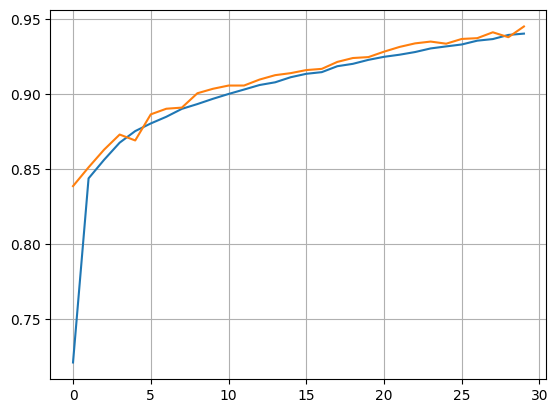

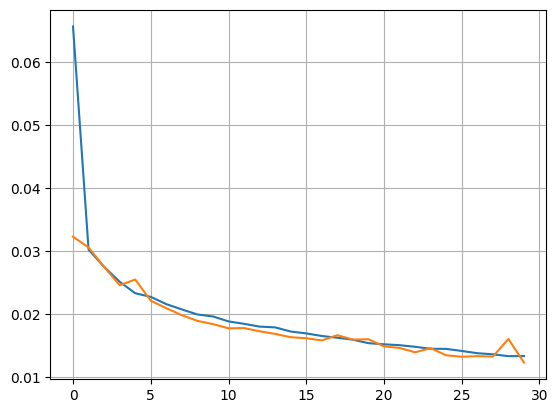

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.show()